# Creating training and test sets

First, let's introduce the same packages and code to calculate our evaluation metrics quickly:

In [1]:
##### added line to ensure plots are showing
# %matplotlib inline
#####

import numpy as np
import matplotlib.pyplot as plt

# The calculations we use for the evaluation calculations
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
from sklearn.metrics import mean_squared_error as mse



# The following function is similar to the one introduced in Week 3.
def calculate_evaluation_measures(x,y,a,b):
    y_hat = []
    for x_i in x:
        y_hat.append(x_i*a+b)

    pe = []
    for j in range(0,len(y)):
        pe_j = (y[j]-y_hat[j])/y[j]*100
        pe.append(abs(pe_j))
    mape = np.average(pe)

    print('Model MAE : ' + str(mae(y,y_hat)))
    print('Model RMSE : '+ str(sqrt(mse(y,y_hat))))
    print('Model MAPE : '+ str(mape))

Next, let's introduce the data we are going to be using:

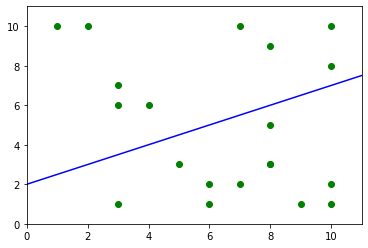

In [2]:
# _o stands for 'original'
x_o = np.array([3,8,3,4,1,7,5,3,8,2,10,8,10,10,9,8,10,6,7,6])
y_o = np.array([7,3,1,6,10,10,3,6,5,10,10,9,8,2,1,3,1,1,2,2])

# Make a scatter plot and overlay with our equations
plt.scatter(x_o,y_o,c='green')

# Fix the a and b parameters to form a linear model.
a = 0.5 # slope
b = 2   # intercept

# Set the axes limits
plt.axis([0, 11, 0, 11])
x = np.array(range(0,12))
plt.plot(x,x*a+b,'b-')
plt.show()


In [3]:
# And calculate evaluation matrices.
calculate_evaluation_measures(x_o,y_o,a,b)

Model MAE : 3.6
Model RMSE : 4.018706259482023
Model MAPE : 151.79166666666669


Then we can obtain training and test sets.

Here we apply a function **tts()**. This function splits arrays or matrices into random training and validation subsets as returns.
Input parameters include
* original data,
* test_size: If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If ``train_size`` is also None, it will be set to 0.25.
* random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

More information can be found in https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

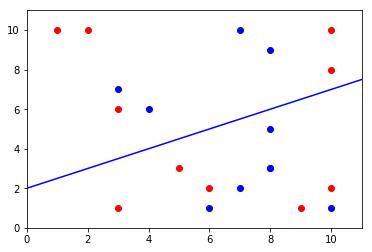

Evaluation 1: 
Model MAE : 3.85
Model RMSE : 4.407380174207803
Model MAPE : 147.91666666666669
Evaluation 2: 
Model MAE : 3.35
Model RMSE : 3.588175023601831
Model MAPE : 155.66666666666666


In [3]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x_o, y_o, test_size=0.5, random_state=42)

plt.scatter(x_train,y_train,c='red')
plt.scatter(x_test,y_test,c='blue')
plt.axis([0, 11, 0, 11])
plt.plot(x,x*a+b,'b-')
plt.show()

print('Evaluation 1: ')
calculate_evaluation_measures(x_train,y_train,a,b)
print('Evaluation 2: ')
calculate_evaluation_measures(x_test,y_test,a,b)

The results give quite reasonable results. They are both comparable to the original figures we had for all three evaluation metrics.

**You will use this function a lot throughout the remainder of the course.**

By default, the function tries to **keep the same proportion of each class** that is presented in the original dataset. Just notice this for a binary case:

In [4]:
x_o = np.array([1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10])
y_o = np.array([5,5,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2])

x_train, x_test, y_train, y_test = tts(x_o, y_o, test_size=0.5, random_state=42)

print('Labels training set: '+str(y_train))
print('Labels test set: '+str(y_test))

Labels training set: [2 5 5 2 5 2 5 2 2 5]
Labels test set: [5 2 2 5 5 5 2 5 2 2]
